# Run the EER models to get test_f1_vecs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
from allennlp.common.util import import_module_and_submodules
import_module_and_submodules('ml')

In [4]:
from ml.models.sentence_f1_stats_predictor import SentenceF1StatsPredictor


In [7]:
from tqdm import tqdm
import json

def make_metric_vec_file(model, f, s=0, e = None, label=''):
    print("loading model")
    predictor = SentenceF1StatsPredictor.from_path(
        model, 'sentence_f1_stats_predictor', cuda_device=0)
    print('loading data')
    data = [ json.loads(line) for line in open(f) ]
    print(f'Got {len(data)} data', flush=True)
    
    metrics_vec = []

    e = len(data) if e is None else e
    for i, datum in enumerate(tqdm(data[s:e], "predicting")):
        try:
            pred = predictor.prediction_metrics(datum)
            metrics_vec.append(pred)
        except Exception as e:
            print('datum')
            print(i, datum)
            raise e
#         pred['metrics']['sents'] = ts = [pred['datum']['tokens']]
#         print(ts)
        
        
    label = '_'+label if label else ''
    outfname = f[:-len('.jsonl')]+label+'_f1_stats.json'
    print('dumping stats to', outfname)
    with open(outfname, 'w') as outf:
        json.dump(metrics_vec, outf)
    

# Run predictor for doc level bootstraps for EER-BERT-short

In [7]:
make_metric_vec_file(
    'experiments/eng-c/ee/eer-short/eer-short',
    'data/conll2003/eng/entity.test-docs.jsonl'
)

loading model
loading data
Got 231 data


predicting:   0%|          | 0/231 [00:00<?, ?it/s]/home/ubuntu/anaconda3/envs/env/lib/python3.7/site-packages/torch_struct/linearchain.py:125: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  on = edge.nonzero()
predicting: 100%|██████████| 231/231 [00:51<00:00,  4.45it/s]

dumping stats to data/conll2003/eng/entity.test-docs_f1_stats.json


In [12]:
print('deu')
make_metric_vec_file(
    'experiments/deu/ee/eer-short',
    'data/conll2003/deu/entity.test-docs.jsonl'
)

deu
loading model
loading data
Got 154 data


predicting: 100%|██████████| 154/154 [00:57<00:00,  2.69it/s]

dumping stats to data/conll2003/deu/entity.test-docs_f1_stats.json


In [13]:
print('esp')
make_metric_vec_file(
    'experiments/esp/ee/eer-short',
    'data/conll2003/esp/entity.test-docs.jsonl'
)

esp
loading model
loading data
Got 126 data


predicting: 100%|██████████| 126/126 [00:48<00:00,  2.58it/s]

dumping stats to data/conll2003/esp/entity.test-docs_f1_stats.json


In [14]:
print('ned')
make_metric_vec_file(
    'experiments/ned/ee/eer-short',
    'data/conll2003/ned/entity.test-docs.jsonl'
)

ned
loading model
loading data
Got 118 data


predicting: 100%|██████████| 118/118 [01:07<00:00,  1.74it/s]

dumping stats to data/conll2003/ned/entity.test-docs_f1_stats.json


In [15]:
print('engo')
make_metric_vec_file(
    'experiments/eng-o/ee/eer-short',
    'data/ontonotes5/processed_docs/english/test.jsonl'
)

engo
loading model
loading data
Got 261 data


predicting: 100%|██████████| 261/261 [03:28<00:00,  1.25it/s]


dumping stats to data/ontonotes5/processed_docs/english/test_f1_stats.json


In [16]:
print('chi')
make_metric_vec_file(
    'experiments/chi/ee/eer-short',
    'data/ontonotes5/processed_docs/chinese/test.jsonl'
)

chi
loading model
loading data
Got 183 data


predicting: 100%|██████████| 183/183 [02:35<00:00,  1.18it/s]


dumping stats to data/ontonotes5/processed_docs/chinese/test_f1_stats.json


In [1]:
print('ara')
make_metric_vec_file(
    'experiments/ara/ee/eer-short',
    'data/ontonotes5/processed_docs/arabic/test.jsonl'
)

# The same but for EER-BERT-shortest


In [8]:
print('engc')
make_metric_vec_file(
    'experiments/eng-c/ee/eer-short-sent',
    'data/conll2003/eng/entity.test-docs.jsonl',
    label='shortest',
)

engc
loading model
loading data
Got 231 data


predicting:   0%|          | 0/231 [00:00<?, ?it/s]/home/ubuntu/anaconda3/envs/env/lib/python3.7/site-packages/torch_struct/linearchain.py:125: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  on = edge.nonzero()
predicting: 100%|██████████| 231/231 [00:44<00:00,  5.21it/s]

dumping stats to data/conll2003/eng/entity.test-docs_shortest_f1_stats.json


In [9]:
print('deu')
make_metric_vec_file(
    'experiments/deu/ee/eer-short-sent',
    'data/conll2003/deu/entity.test-docs.jsonl',
    label='shortest',
)

deu
loading model
loading data
Got 154 data


predicting: 100%|██████████| 154/154 [00:51<00:00,  3.01it/s]

dumping stats to data/conll2003/deu/entity.test-docs_shortest_f1_stats.json


In [10]:
print('esp')
make_metric_vec_file(
    'experiments/esp/ee/eer-short-sent',
    'data/conll2003/esp/entity.test-docs.jsonl',
    label='shortest',
)

esp
loading model
loading data
Got 126 data


predicting: 100%|██████████| 126/126 [00:43<00:00,  2.88it/s]

dumping stats to data/conll2003/esp/entity.test-docs_shortest_f1_stats.json


In [11]:
print('ned')
make_metric_vec_file(
    'experiments/ned/ee/eer-short-sent',
    'data/conll2003/ned/entity.test-docs.jsonl',
    label='shortest',
)

ned
loading model
loading data
Got 118 data


predicting: 100%|██████████| 118/118 [01:04<00:00,  1.83it/s]

dumping stats to data/conll2003/ned/entity.test-docs_shortest_f1_stats.json


In [19]:
print('engo')
make_metric_vec_file(
    'experiments/eng-o/ee/eer-short-sent',
    'data/ontonotes5/processed_docs/english/test.jsonl',
    label='shortest',
)

engo
loading model
loading data
Got 261 data



predicting:  48%|████▊     | 126/261 [01:19<00:34,  3.86it/s]


predicting:  97%|█████████▋| 252/261 [02:53<00:04,  2.21it/s]


predicting: 100%|██████████| 261/261 [02:58<00:00,  1.46it/s]

dumping stats to data/ontonotes5/processed_docs/english/test_shortest_f1_stats.json


In [20]:
print('chi')
make_metric_vec_file(
    'experiments/chi/ee/eer-short-sent',
    'data/ontonotes5/processed_docs/chinese/test.jsonl',
    label='shortest',
)

chi
loading model
loading data
Got 183 data



predicting:  69%|██████▉   | 126/183 [01:29<00:20,  2.77it/s]


predicting: 100%|██████████| 183/183 [02:18<00:00,  1.33it/s]

dumping stats to data/ontonotes5/processed_docs/chinese/test_shortest_f1_stats.json


In [21]:
print('ara')
make_metric_vec_file(
    'experiments/ara/ee/eer-short-sent',
    'data/ontonotes5/processed_docs/arabic/test.jsonl',
    label='shortest',
)

ara
loading model
loading data
Got 44 data



predicting:  41%|████      | 18/44 [00:56<01:19,  3.04s/it]

******* INVALID TAGGING, SHOULDNT HAPPEN outside of training... *********

O O O O O O O O O O B-ORDINAL I-ORDINAL I-ORDINAL I-ORDINAL I-ORDINAL I-ORDINAL L-ORDINAL O O O O O O O O O O O O O B-PERSON I-PERSON I-PERSON I-PERSON I-PERSON L-PERSON O O O O O O O O O O O O O O O O O O O O O O O O O O O O O B-PERSON I-PERSON I-PERSON I-PERSON I-PERSON I-PERSON I-PERSON I-PERSON L-PERSON O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O B-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG I-ORG L-ORG O B-GPE I-GPE I-GPE I-GPE L-GPE O O O O O O O O O O O O O B-PERSON I-PERSON I-PERSON I-PERSON I-PERSON I-PERSON I-PERSON I-PERSON I-PERSON I-PERSON L-PERSON O O O B-WORK_OF_ART I-WORK_OF_ART I-WORK_OF_ART I-WORK_OF_ART I-WORK_OF_ART I-WORK_OF_ART I-WORK_OF_ART I-WORK_OF_ART I-WORK_OF_ART I-WORK_OF_ART I-WORK_OF


predicting: 100%|██████████| 44/44 [02:24<00:00,  3.28s/it]

dumping stats to data/ontonotes5/processed_docs/arabic/test_shortest_f1_stats.json


# Perform the bootstraps

In [13]:
from tqdm import tqdm
import json
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()

def precision(tp, fp):
    return tp/(tp+fp) if (tp+fp) else 0.0

def recall(tp, fn):
    return tp/(tp+fn) if (tp+fn) else 0.0

def f1(tp, fp, fn):
    p = precision(tp, fp)
    r = recall(tp, fn)
    return 2*p*r/(p+r) if (p+r) else 0.0


def bootstrap_paired_diff(x, y, N=10000):
    assert len(x) == len(y)
    paired_diffs = []
    for n in tqdm(range(N), 'Bootstrapping'):
        i_n = np.random.choice(np.arange(len(x)), replace=True, size=len(x))
        x_n = np.array([ x[i] for i in i_n ]).sum(axis=0)
        y_n = np.array([ y[i] for i in i_n ]).sum(axis=0)
        d_n = f1(*x_n.tolist()) - f1(*y_n.tolist())
        paired_diffs.append(d_n)
#         if n < 10:
#             print(x_n, y_n, d_n)
    return paired_diffs

# SNS-BERT-shortest vs. EER-BERT-short

In [26]:
paired_raw_stat_files = dict(
    eng=['data/conll2003/eng/entity.test-docs_f1_stats.json',
     'NegSampling-NER/data/conll2003/eng_P-1000/test_f1_outputs.json'],
    deu=['data/conll2003/deu/entity.test-docs_f1_stats.json',
     'NegSampling-NER/data/conll2003/deu_P-1000/test_f1_outputs.json'],
    esp=['data/conll2003/esp/entity.test-docs_f1_stats.json',
     'NegSampling-NER/data/conll2003/esp_P-1000/test_f1_outputs.json'],
    ned=['data/conll2003/ned/entity.test-docs_f1_stats.json',
     'NegSampling-NER/data/conll2003/ned_P-1000/test_f1_outputs.json'],
    english=['data/ontonotes5/processed_docs/english/test_f1_stats.json',
     'NegSampling-NER/data/ontonotes5/english_P-1000/test_f1_outputs.json'],
    chinese=['data/ontonotes5/processed_docs/chinese/test_f1_stats.json',
     'NegSampling-NER/data/ontonotes5/chinese_P-1000/test_f1_outputs.json'],
    arabic=['data/ontonotes5/processed_docs/arabic/test_f1_stats.json',
     'NegSampling-NER/data/ontonotes5/arabic_P-1000/test_f1_outputs.json'],
)

paired_raw = dict()
for k, [a,b] in paired_raw_stat_files.items():
    print('\n===',k)
    x = [ (d['micro-tp'], d['micro-fp'], d['micro-fn']) for d in json.load(open(a)) ]
    
    # Combine sentence predictions by doc
    y = []
    last_did = None
    tp, fp, fn = 0, 0, 0
    xi = 0
    atp, afp, afn = x[xi]
    one_more = False
    for d in json.load(open(b)):

        tp += d['micro-tp']
        fp += d['micro-fp']
        fn += d['micro-fn']
        if (tp+fn) == (atp+afn):
            # If we have hit the same number of golds, consider it aligned and add the data point
            y.append((tp, fp, fn))
            tp, fp, fn = 0, 0, 0
            xi += 1
            if xi < len(x):
                atp, afp, afn = x[xi]

    if (tp+fp+fn):
        y.append((tp, fp, fn))
    print(len(x), len(y))
        
#     y = [ (d['micro-tp'], d['micro-fp'], d['micro-fn']) for d in json.load(open(b)) ]
    paired_raw[k] = (x,y)
    



=== eng
231 231

=== deu
154 154

=== esp
126 126

=== ned
118 118

=== english
261 261

=== chinese
183 183

=== arabic
44 44


In [36]:
# Sanity check that the straight up F1s match the tables
for lang in paired_raw_stat_files:
    print(lang)
    print('EER short F1', f1(*np.array(paired_raw[lang][0]).sum(axis=0).tolist()))
    print('SNS shortest F1', f1(*np.array(paired_raw[lang][1]).sum(axis=0).tolist()))
    

eng
EER short F1 0.8900569426193604
SNS shortest F1 0.8388621285104063
deu
EER short F1 0.7219500244977952
SNS shortest F1 0.7008760951188987
esp
EER short F1 0.7648374786156072
SNS shortest F1 0.7678571428571429
ned
EER short F1 0.8026284348864995
SNS shortest F1 0.7707489878542509
english
EER short F1 0.7586558044806517
SNS shortest F1 0.7556113767117738
chinese
EER short F1 0.614002161178411
SNS shortest F1 0.6328682779851968
arabic
EER short F1 0.4684645498042627
SNS shortest F1 0.4067135050741608


In [30]:

lang_diffs = dict()
all_raw_eer, all_raw_sns = [], []
for i, lang in enumerate(paired_raw):
    print(lang, flush=True)
    raw_eer, raw_sns = paired_raw[lang]
    all_raw_eer.extend(raw_eer)
    all_raw_sns.extend(raw_sns)
    lang_diffs[lang] = bootstrap_paired_diff(raw_eer, raw_sns, N=100000)
    
print('all', flush=True)
lang_diffs['ALL'] = bootstrap_paired_diff(all_raw_eer, all_raw_sns, N=100000)

eng


Bootstrapping: 100%|██████████| 100000/100000 [00:40<00:00, 2462.41it/s]

deu



Bootstrapping: 100%|██████████| 100000/100000 [00:29<00:00, 3400.72it/s]

esp



Bootstrapping: 100%|██████████| 100000/100000 [00:25<00:00, 3957.40it/s]

ned



Bootstrapping: 100%|██████████| 100000/100000 [00:24<00:00, 4109.02it/s]

english



Bootstrapping: 100%|██████████| 100000/100000 [00:44<00:00, 2258.15it/s]

chinese



Bootstrapping: 100%|██████████| 100000/100000 [00:33<00:00, 2949.63it/s]

arabic



Bootstrapping: 100%|██████████| 100000/100000 [00:13<00:00, 7299.32it/s]

all



Bootstrapping: 100%|██████████| 100000/100000 [02:36<00:00, 639.50it/s]


eng
deu
esp
ned
english
chinese
arabic


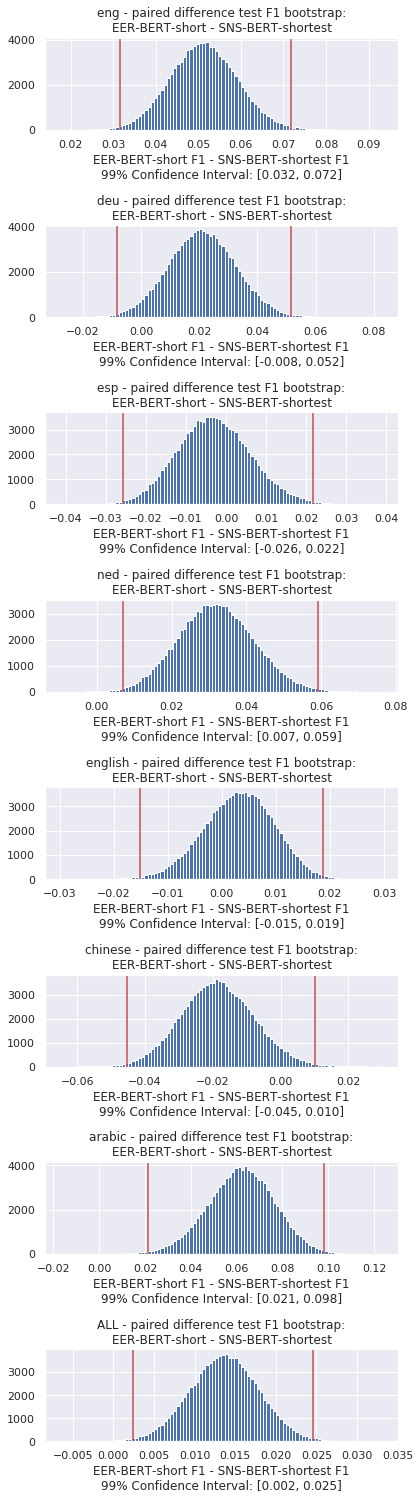

In [33]:
fig, axs = plt.subplots(len(paired_raw)+1, figsize=(6,len(paired_raw)*3))
def hist(ax, diffs, lang, alpha=0.01):
    _ = ax.hist(diffs, bins=100)
    
    l, r = tuple(np.quantile(diffs, [alpha/2, 1.0-alpha/2]).tolist())
    ax.axvline(l, color='r')
    ax.axvline(r, color='r')
    ax.set_xlabel(f'EER-BERT-short F1 - SNS-BERT-shortest F1\n{100.*(1-alpha):2.0f}% Confidence Interval: [{l:2.3f}, {r:2.3f}]')
    ax.set_title(f'{lang} - paired difference test F1 bootstrap:\nEER-BERT-short - SNS-BERT-shortest')
    return ax

for i, lang in enumerate(paired_raw):
    print(lang, flush=True)
    try:
        ax = axs[i]
        diffs = lang_diffs[lang]
        hist(ax, diffs, lang)
    except Exception as e:
        print(e)
ax = axs[-1]
hist(ax, lang_diffs['ALL'], 'ALL')
plt.tight_layout()

# EER-BERT-shortest vs SNS-BERT-shortest

In [34]:
paired_raw_stat_files = dict(
    eng=['data/conll2003/eng/entity.test-docs_shortest_f1_stats.json',
     'NegSampling-NER/data/conll2003/eng_P-1000/test_f1_outputs.json'],
    deu=['data/conll2003/deu/entity.test-docs_shortest_f1_stats.json',
     'NegSampling-NER/data/conll2003/deu_P-1000/test_f1_outputs.json'],
    esp=['data/conll2003/esp/entity.test-docs_shortest_f1_stats.json',
     'NegSampling-NER/data/conll2003/esp_P-1000/test_f1_outputs.json'],
    ned=['data/conll2003/ned/entity.test-docs_shortest_f1_stats.json',
     'NegSampling-NER/data/conll2003/ned_P-1000/test_f1_outputs.json'],
    english=['data/ontonotes5/processed_docs/english/test_shortest_f1_stats.json',
     'NegSampling-NER/data/ontonotes5/english_P-1000/test_f1_outputs.json'],
    chinese=['data/ontonotes5/processed_docs/chinese/test_shortest_f1_stats.json',
     'NegSampling-NER/data/ontonotes5/chinese_P-1000/test_f1_outputs.json'],
    arabic=['data/ontonotes5/processed_docs/arabic/test_shortest_f1_stats.json',
     'NegSampling-NER/data/ontonotes5/arabic_P-1000/test_f1_outputs.json'],
)

paired_raw_shortest = dict()
for k, [a,b] in paired_raw_stat_files.items():
    print('\n===',k)
    x = [ (d['micro-tp'], d['micro-fp'], d['micro-fn']) for d in json.load(open(a)) ]
    
    # Combine sentence predictions by doc
    y = []
    last_did = None
    tp, fp, fn = 0, 0, 0
    xi = 0
    atp, afp, afn = x[xi]
    one_more = False
    for d in json.load(open(b)):

        tp += d['micro-tp']
        fp += d['micro-fp']
        fn += d['micro-fn']
        if (tp+fn) == (atp+afn):
            # If we have hit the same number of golds, consider it aligned and add the data point
            y.append((tp, fp, fn))
            tp, fp, fn = 0, 0, 0
            xi += 1
            if xi < len(x):
                atp, afp, afn = x[xi]

    if (tp+fp+fn):
        y.append((tp, fp, fn))
    print(len(x), len(y))
        
#     y = [ (d['micro-tp'], d['micro-fp'], d['micro-fn']) for d in json.load(open(b)) ]
    paired_raw_shortest[k] = (x,y)
    



=== eng
231 231

=== deu
154 154

=== esp
126 126

=== ned
118 118

=== english
261 261

=== chinese
183 183

=== arabic
44 44


In [37]:
# Sanity check that the straight up F1s match the tables
for lang in paired_raw_stat_files:
    print(lang)
    print('EER shortest F1', f1(*np.array(paired_raw_shortest[lang][0]).sum(axis=0).tolist()))
    print('SNS shortest F1', f1(*np.array(paired_raw_shortest[lang][1]).sum(axis=0).tolist()))
    

eng
EER shortest F1 0.8733534222987517
SNS shortest F1 0.8388621285104063
deu
EER shortest F1 0.7363335875921687
SNS shortest F1 0.7008760951188987
esp
EER shortest F1 0.7649745530471095
SNS shortest F1 0.7678571428571429
ned
EER shortest F1 0.7415341339391972
SNS shortest F1 0.7707489878542509
english
EER shortest F1 0.7404370584574838
SNS shortest F1 0.7556113767117738
chinese
EER shortest F1 0.6431618867030102
SNS shortest F1 0.6328682779851968
arabic
EER shortest F1 0.420844327176781
SNS shortest F1 0.4067135050741608


In [38]:

lang_diffs_shortest = dict()
all_raw_eer_shortest, all_raw_sns_shortest = [], []
for i, lang in enumerate(paired_raw_shortest):
    print(lang, flush=True)
    raw_eer, raw_sns = paired_raw_shortest[lang]
    all_raw_eer_shortest.extend(raw_eer)
    all_raw_sns_shortest.extend(raw_sns)
    lang_diffs_shortest[lang] = bootstrap_paired_diff(raw_eer, raw_sns, N=100000)
    
print('all', flush=True)
lang_diffs_shortest['ALL'] = bootstrap_paired_diff(all_raw_eer_shortest, all_raw_sns_shortest, N=100000)

eng


Bootstrapping: 100%|██████████| 100000/100000 [00:40<00:00, 2446.88it/s]

deu



Bootstrapping: 100%|██████████| 100000/100000 [00:28<00:00, 3463.83it/s]

esp



Bootstrapping: 100%|██████████| 100000/100000 [00:24<00:00, 4053.44it/s]

ned



Bootstrapping: 100%|██████████| 100000/100000 [00:23<00:00, 4220.35it/s]

english



Bootstrapping: 100%|██████████| 100000/100000 [00:43<00:00, 2304.45it/s]

chinese



Bootstrapping: 100%|██████████| 100000/100000 [00:33<00:00, 3010.56it/s]

arabic



Bootstrapping: 100%|██████████| 100000/100000 [00:14<00:00, 7047.95it/s]

all



Bootstrapping: 100%|██████████| 100000/100000 [02:36<00:00, 637.80it/s]


eng
deu
esp
ned
english
chinese
arabic


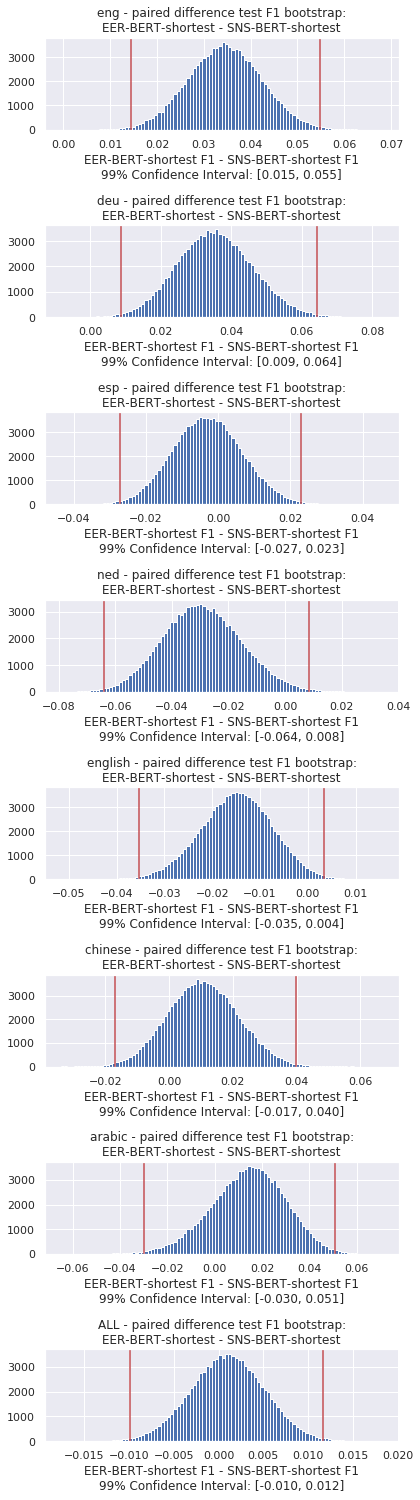

In [39]:
fig, axs = plt.subplots(len(paired_raw_shortest)+1, figsize=(6,len(paired_raw_shortest)*3))
def hist(ax, diffs, lang, alpha=0.01):
    _ = ax.hist(diffs, bins=100)
    
    l, r = tuple(np.quantile(diffs, [alpha/2, 1.0-alpha/2]).tolist())
    ax.axvline(l, color='r')
    ax.axvline(r, color='r')
    ax.set_xlabel(f'EER-BERT-shortest F1 - SNS-BERT-shortest F1\n{100.*(1-alpha):2.0f}% Confidence Interval: [{l:2.3f}, {r:2.3f}]')
    ax.set_title(f'{lang} - paired difference test F1 bootstrap:\nEER-BERT-shortest - SNS-BERT-shortest')
    return ax

for i, lang in enumerate(paired_raw_shortest):
    print(lang, flush=True)
    try:
        ax = axs[i]
        diffs = lang_diffs_shortest[lang]
        hist(ax, diffs, lang)
    except Exception as e:
        print(e)
ax = axs[-1]
hist(ax, lang_diffs_shortest['ALL'], 'ALL')
plt.tight_layout()